Day 12 from Advent of Code 2021

January 28, 2023


UPDATE:  (January 29, 2023)  Here are all of the webpages that were necessary for figuring things out and doing this

			https://networkx.org/documentation/stable/tutorial.html#attributes
			https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.parse_edgelist.html#networkx.readwrite.edgelist.parse_edgelist
			https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.simple_paths.all_simple_paths.html#all-simple-paths
			https://networkx.org/documentation/stable/reference/algorithms/index.html
			
			https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.neighbors.html#networkx.classes.function.neighbors
			https://networkx.org/documentation/stable/reference/algorithms/simple_paths.html
			
			https://docs.python.org/3/library/stdtypes.html



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import networkx as nx
np.set_printoptions(linewidth=250)



In [2]:

with open("12s.txt") as f:
    slines = f.readlines()
slines = [x.strip() for x in slines]

with open("12.txt") as f:
    contents = f.readlines()
contents = [x.strip() for x in contents]

small_sample = ['dc-end',
'HN-start',
'start-kj',
'dc-start',
'dc-HN',
'LN-dc',
'HN-end',
'kj-sa',
'kj-HN',
'kj-dc']

In [3]:
contents

['vn-DD',
 'qm-DD',
 'MV-xy',
 'end-xy',
 'KG-end',
 'end-kw',
 'qm-xy',
 'start-vn',
 'MV-vn',
 'vn-ko',
 'lj-KG',
 'DD-xy',
 'lj-kh',
 'lj-MV',
 'ko-MV',
 'kw-qm',
 'qm-MV',
 'lj-kw',
 'VH-lj',
 'ko-qm',
 'ko-start',
 'MV-start',
 'DD-ko']

#### Data to a graph

Convert both sample data and actual data into graphs.

In [4]:
S = nx.parse_edgelist(slines,delimiter='-')
G = nx.parse_edgelist(contents,delimiter='-')
L = nx.parse_edgelist(small_sample,delimiter='-')

In [5]:
S.edges

EdgeView([('fs', 'end'), ('fs', 'he'), ('fs', 'DX'), ('fs', 'pj'), ('end', 'zg'), ('he', 'DX'), ('he', 'pj'), ('he', 'RW'), ('he', 'WI'), ('he', 'zg'), ('DX', 'start'), ('DX', 'pj'), ('start', 'pj'), ('start', 'RW'), ('pj', 'zg'), ('pj', 'RW'), ('zg', 'sl'), ('zg', 'RW')])

In [6]:
G.nodes

NodeView(('vn', 'DD', 'qm', 'MV', 'xy', 'end', 'KG', 'kw', 'start', 'ko', 'lj', 'kh', 'VH'))

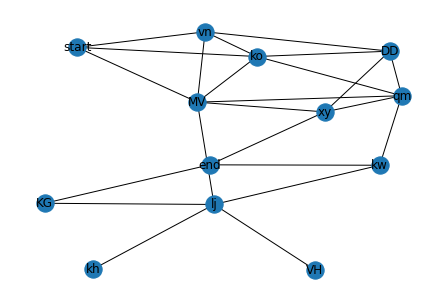

In [7]:
nx.draw(G, with_labels=True)

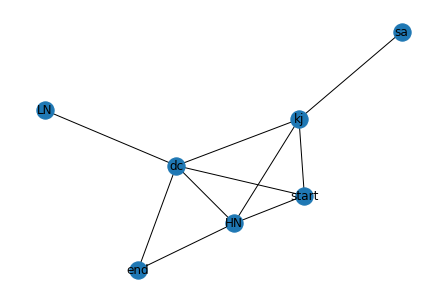

In [8]:
nx.draw(L, with_labels=True)

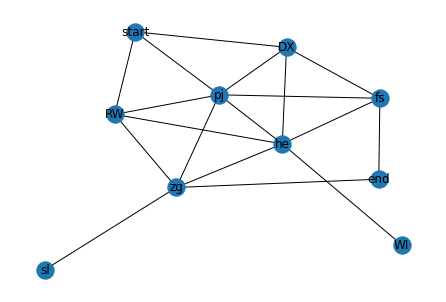

In [9]:
nx.draw(S, with_labels=True)

In [10]:
paths = list(nx.all_simple_paths(L, source='start', target='end', cutoff=20))

In [11]:
paths

[['start', 'HN', 'dc', 'end'],
 ['start', 'HN', 'end'],
 ['start', 'HN', 'kj', 'dc', 'end'],
 ['start', 'kj', 'HN', 'dc', 'end'],
 ['start', 'kj', 'HN', 'end'],
 ['start', 'kj', 'dc', 'end'],
 ['start', 'kj', 'dc', 'HN', 'end'],
 ['start', 'dc', 'end'],
 ['start', 'dc', 'HN', 'end'],
 ['start', 'dc', 'kj', 'HN', 'end']]

In [12]:
len(paths)

10

In [13]:
paths = list(nx.all_simple_paths(L, source='HN', target='end', cutoff=20))

In [14]:
def get_paths(g,start,end):
    return list(nx.all_simple_paths(g, source=start, target=end, cutoff=20))

In [15]:
get_paths(L,'start','dc')

[['start', 'HN', 'dc'],
 ['start', 'HN', 'end', 'dc'],
 ['start', 'HN', 'kj', 'dc'],
 ['start', 'kj', 'HN', 'dc'],
 ['start', 'kj', 'HN', 'end', 'dc'],
 ['start', 'kj', 'dc'],
 ['start', 'dc']]

In [16]:
get_paths(L,'dc','end')

[['dc', 'end'],
 ['dc', 'start', 'HN', 'end'],
 ['dc', 'start', 'kj', 'HN', 'end'],
 ['dc', 'HN', 'end'],
 ['dc', 'kj', 'start', 'HN', 'end'],
 ['dc', 'kj', 'HN', 'end']]

In [17]:
list(L.adjacency())

[('dc', {'end': {}, 'start': {}, 'HN': {}, 'LN': {}, 'kj': {}}),
 ('end', {'dc': {}, 'HN': {}}),
 ('HN', {'start': {}, 'dc': {}, 'end': {}, 'kj': {}}),
 ('start', {'HN': {}, 'kj': {}, 'dc': {}}),
 ('kj', {'start': {}, 'sa': {}, 'HN': {}, 'dc': {}}),
 ('LN', {'dc': {}}),
 ('sa', {'kj': {}})]

In [18]:
list(nx.neighbors(L,'start'))

['HN', 'kj', 'dc']

In [19]:
def jungle(g,start,end):
    
    slist = [[start]]
    rounds = 2*len(g.nodes)
    cr = 0
    single_nodes = [x for x in g.nodes if x.islower() ]
    
    
    while cr < rounds:
        cr = cr + 1
        new = []
        for l in slist:
            last_node = l[-1]
            if last_node == end:
                new.append(l)
            else:
                for n in nx.neighbors(g,last_node):
                    if n in single_nodes:
                        if n not in l:
                            new.append(l + [n])
                    else:
                        if end not in l:
                            new.append(l + [n])
                    
            
        slist = new
    return slist
            
            
        

In [20]:
len(jungle(L,'start','end'))

19

In [21]:
len(jungle(S,'start','end'))

226

In [22]:
len(jungle(G,'start','end'))

3292

In [23]:
def madness(g,start,end):
    
    slist = [[start]]
    rounds = 2*len(g.nodes)
    cr = 0
    single_nodes = [x for x in g.nodes if x.islower() ]
    only_nodes = [start,end]
    
    
    while cr < rounds:
        cr = cr + 1
        new = []
        for l in slist:
            last_node = l[-1]
            if last_node == end:
                new.append(l)
            else:
                for n in nx.neighbors(g,last_node):
                    if n in single_nodes:
                        counts = max([l.count(x) for x in single_nodes])
                        if n not in l:
                            new.append(l + [n])
                        elif (counts < 2) and (n not in only_nodes):
                            new.append(l + [n])
                        
                    else:
                        if end not in l:
                            new.append(l + [n])
                    
            
        slist = new
    return slist
            
            
        

In [24]:
pink = jungle(L,'start','end')

In [25]:
pink[3].count('HN')

2

In [26]:
[pink[3].count(x) for x in ['start','dc','kj','end']]

[1, 1, 1, 1]

In [27]:
pink[3]

['start', 'HN', 'dc', 'kj', 'HN', 'end']

In [28]:
len(madness(L,'start','end'))

103

In [29]:
len(madness(S,'start','end'))

3509

In [30]:
len(madness(G,'start','end'))

89592